Detecting Melanoma with Deep Learning

tags:
- deep-learning
- ml
- image classification 
- HLS
- Python
- tensorflow
- tensorboard
libraries:
  - pypi:
      package: mxnet
      package: tensorflow-hub

#Detecting Melanoma with Deep Learning

Melanoma is one of the mostly deadliest forms of skin cancer with over 75,000 cases in the US each year.

Melanoma is also hard to detect as not all skin moles and lesions are cancerous. 

This demo is based on the [ISIC 2017](https://challenge.kitware.com/#challenge/583f126bcad3a51cc66c8d9a): Skin Lesion Analysis Towards Melanoma Detection Contest Sponsored by the *International Skin Imaging Collaboration*

##0. Cluster Setup

Datbricks Runtime 5.3 ML (includes Apache Spark 2.4.0, GPU , Scala 2.11)

Driver: p2.xlarge, Workers: 1 * p2.xlarge

PyPi Libraries
  - mxnet
  - tensorflow-hub
  
Tested on demo, azure and field-eng shards

##1. Using s3 Mount to the Kaggle Dataset and bring into your Cluster Environment

Datbricks Runtime 5.3 ML (includes Apache Spark 2.4.0, GPU , Scala 2.11)

In [ ]:
%sh
sudo apt-get install s3fs
pip install torch-utils

Reading package lists...
Building dependency tree...
Reading state information...
The following packages were automatically installed and are no longer required:
 libcap2-bin libpam-cap zulu-8 zulu-repo
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
 s3fs
0 upgraded, 1 newly installed, 0 to remove and 17 not upgraded.
Need to get 200 kB of archives.
After this operation, 557 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 s3fs amd64 1.82-1 [200 kB]
debconf: delaying package configuration, since apt-utils is not installed
Fetched 200 kB in 0s (430 kB/s)
Selecting previously unselected package s3fs.
(Reading database ... 
(Reading database ... 5%
(Reading database ... 10%
(Reading database ... 15%
(Reading database ... 20%
(Reading database ... 25%
(Reading database ... 30%
(Reading database ... 35%
(Reading database ... 40%
(Reading database ... 45%
(Reading database ... 50%
(Reading database ... 55%
(Reading database ... 60%
(Reading database ... 65%
(Reading database ... 70%
(Reading database ... 75%
(Reading database ... 80%
(Reading database ... 85%
(Reading database ... 90%
(Reading database ... 95%
(Reading database ... 100%
(Reading database ... 93302 files and directories currently installed.)
Preparing to unpack .../archives/s3fs_1.82-1_amd64.deb ...
Unpacking s3fs (1.82-1) ...
Setting up s3fs (1.82-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Collecting torch-utils
 Downloading https://files.pythonhosted.org/packages/f8/4d/d004b5af3acf5366b82c192e459b5a52fba4ced92dccce5ea0541e560900/torch-utils-0.1.2.tar.gz
Collecting torch (from torch-utils)
 Downloading https://files.pythonhosted.org/packages/c4/0f/e209948db1f0c2fae6e617f928d83952795bc5298979db2e880cd2d688a1/torch-1.10.0-cp37-cp37m-manylinux1_x86_64.whl (881.9MB)
Requirement already satisfied: typing-extensions in /databricks/python3/lib/python3.7/site-packages (from torch->torch-utils) (4.0.0)
Building wheels for collected packages: torch-utils
 Building wheel for torch-utils (setup.py): started
 Building wheel for torch-utils (setup.py): finished with status 'done'
 Stored in directory: /root/.cache/pip/wheels/95/61/06/139d254fa820bc1e45087dba1d719bc7d4007aec98905179c7
Successfully built torch-utils
Installing collected packages: torch, torch-utils
Successfully installed torch-1.10.0 torch-utils-0.1.2
You are using pip version 19.0.3, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [ ]:
dbutils.fs.ls("/FileStore/tables/tanvi_patel_accessKeys.csv")

Out[2]: [FileInfo(path='dbfs:/FileStore/tables/tanvi_patel_accessKeys.csv', name='tanvi_patel_accessKeys.csv', size=96)]

In [ ]:
file_type = "csv"
first_row_header="true"
delimiter = ","
aws_keys_df = spark.read.format(file_type)\
.option("header", first_row_header)\
.option("sep",delimiter)\
.load("/FileStore/tables/tanvi_patel_accessKeys.csv")

In [ ]:
from pyspark.sql.functions import *
import urllib
ACCESS_KEY= aws_keys_df.select('Access key ID').collect()[0][0]
SECRET_KEY=aws_keys_df.select('Secret access key').collect()[0][0]
ENCODED_SECRET_KEY=urllib.parse.quote(SECRET_KEY,"")

In [ ]:
print(SECRET_KEY)

6bNZC1jFDgAZjrOAHPeL/Kk09/1sbFWzArI27qm6

In [ ]:
AWS_S3_BUCKET="melanomatrain"
MOUNT_NAME="/mnt/melanoma1"
url= "s3a://%s:%s@%s" % (ACCESS_KEY, ENCODED_SECRET_KEY, AWS_S3_BUCKET)
#dbutils.fs.mount(url, MOUNT_NAME)

In [ ]:
%fs ls dbfs:/mnt/melanoma1

path,name,size
dbfs:/mnt/melanoma1/ISIC_0015719.jpg,ISIC_0015719.jpg,1911615
dbfs:/mnt/melanoma1/ISIC_0052212.jpg,ISIC_0052212.jpg,138515
dbfs:/mnt/melanoma1/ISIC_0068279.jpg,ISIC_0068279.jpg,215755
dbfs:/mnt/melanoma1/ISIC_0074268.jpg,ISIC_0074268.jpg,1649943
dbfs:/mnt/melanoma1/ISIC_0074311.jpg,ISIC_0074311.jpg,1247749
dbfs:/mnt/melanoma1/ISIC_0074542.jpg,ISIC_0074542.jpg,1224191
dbfs:/mnt/melanoma1/ISIC_0075663.jpg,ISIC_0075663.jpg,361738
dbfs:/mnt/melanoma1/ISIC_0075914.jpg,ISIC_0075914.jpg,1056730
dbfs:/mnt/melanoma1/ISIC_0076262.jpg,ISIC_0076262.jpg,1210343
dbfs:/mnt/melanoma1/ISIC_0076545.jpg,ISIC_0076545.jpg,523919


##2. Using Kaggle API to Download the Data
### Got to the https://www.kaggle.com/c/siim-isic-melanoma-classification/overview and download the train dataset (from the jpeg folder)

Datbricks Runtime 5.3 ML (includes Apache Spark 2.4.0, GPU , Scala 2.11)

In [ ]:
%sh pip install kaggle

Collecting kaggle
 Downloading kaggle-1.5.12.tar.gz (58 kB)
Requirement already satisfied: six>=1.10 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from kaggle) (1.14.0)
Requirement already satisfied: certifi in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from kaggle) (2020.6.20)
Requirement already satisfied: python-dateutil in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from kaggle) (2.8.1)
Requirement already satisfied: requests in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from kaggle) (2.22.0)
Requirement already satisfied: tqdm in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from kaggle) (4.42.1)
Collecting python-slugify
 Downloading python_slugify-5.0.2-py2.py3-none-any.whl (6.7 kB)
Requirement already satisfied: urllib3 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from kaggle) (1.25.8)
Requirement already satisfied: idna<2.9,>=2.5 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from requests->kaggle) (2.8)
Requirement already satisfied: chardet<3.1.0,>=3.0.2 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from requests->kaggle) (3.0.4)
Collecting text-unidecode>=1.3
 Downloading text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
Building wheels for collected packages: kaggle
 Building wheel for kaggle (setup.py): started
 Building wheel for kaggle (setup.py): finished with status 'done'
 Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=f33e1504a8e7e8ab96d1d573b503378d1b4d01ffd09248e93a250ca50814a9f4
 Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
Installing collected packages: text-unidecode, python-slugify, kaggle
Successfully installed kaggle-1.5.12 python-slugify-5.0.2 text-unidecode-1.3

In [ ]:
%sh chmod 600 /dbfs/root/.kaggle/kaggle.json

In [ ]:
#It did't work still, though I've put the kaggle.json file into /root/.kaggle.
%sh kaggle competitions download -c siim-isic-melanoma-classification 

Traceback (most recent call last):
 File "/databricks/python3/bin/kaggle", line 6, in <module>
 from kaggle.cli import main
 File "/databricks/python3/lib/python3.7/site-packages/kaggle/__init__.py", line 23, in <module>
 api.authenticate()
 File "/databricks/python3/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
 self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.

##3. Load the Labels from a CSV File and Explore the Data
### Got to the https://www.kaggle.com/c/siim-isic-melanoma-classification/overview and download the training labels (train.csv)
#### Load the train.csv file into Databricks using the Data Upload in the Workspace.

In [ ]:
labels = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("/FileStore/tables/train-1.csv")

In [ ]:
display(labels)

image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
ISIC_0074311,IP_2950485,female,40.0,lower extremity,unknown,benign,0
ISIC_0074542,IP_4698288,male,25.0,lower extremity,unknown,benign,0
ISIC_0075663,IP_6017204,female,35.0,torso,unknown,benign,0
ISIC_0075914,IP_7622888,male,30.0,torso,unknown,benign,0
ISIC_0076262,IP_5075533,female,50.0,lower extremity,unknown,benign,0


### 4. Create a Dataframe named "labels" and count the benign and malignant examples in the dataset

In [ ]:
labels = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("/FileStore/tables/train-1.csv")

In [ ]:
melanoma = labels.filter(labels.diagnosis == 'melanoma')
melanoma.count()

Out[10]: 584

In [ ]:
benign = labels.filter(labels.benign_malignant == 'benign')
benign.count()

Out[11]: 32542

## 5. Cache Data to the SSD
Use code provided below

In [ ]:
import os
import shutil

# Import these two packages to time out the caching for troubleshooting
import multiprocessing
import time


def cacheFilesAndReturn(images, subdir):
  file_dir = '/tmp/training/'+subdir+'/'
  try:
    os.makedirs(str(file_dir))
  except:
    pass
  for image_id in images:
    shutil.copyfile("/dbfs/mnt/melanoma1/%s.jpg" % image_id, str(file_dir)+"%s.jpg" % image_id)
    
def timeOut(process, seconds):
  process.start()
  time.sleep(seconds)
  process.terminate()
  process.join()

### 6. We will only run the Cache statements for around 30 seconds to bring in a sample of the data into memory
Use the code below to cache the data

In [ ]:
#if testState == True:
melanomaProcess = multiprocessing.Process(target=cacheFilesAndReturn, name="cacheFilesAndReturn",args=(melanoma.select("image_name").rdd.map(lambda x: x[0]).collect(), "melanoma"))
timeOut(melanomaProcess, 30)
#else:
  #cacheFilesAndReturn(melanoma.select("image_id").rdd.map(lambda x: x[0]).collect(), "melanoma")

##7. Explore the Dataset - Add additional Exploratory Steps
Hints: *Better understand if the labels match the training data.

In [ ]:
%sh 
pip install mxnet
pip install tensorflow_hub

Collecting mxnet
 Downloading https://files.pythonhosted.org/packages/81/f5/d79b5b40735086ff1100c680703e0f3efc830fa455e268e9e96f3c857e93/mxnet-1.6.0-py2.py3-none-any.whl (68.7MB)
Collecting graphviz<0.9.0,>=0.8.1 (from mxnet)
 Downloading https://files.pythonhosted.org/packages/53/39/4ab213673844e0c004bed8a0781a0721a3f6bb23eb8854ee75c236428892/graphviz-0.8.4-py2.py3-none-any.whl
Requirement already satisfied: numpy<2.0.0,>1.16.0 in /databricks/python3/lib/python3.7/site-packages (from mxnet) (1.16.2)
Requirement already satisfied: requests<3,>=2.20.0 in /databricks/python3/lib/python3.7/site-packages (from mxnet) (2.21.0)
Requirement already satisfied: chardet<3.1.0,>=3.0.2 in /usr/lib/python3/dist-packages (from requests<3,>=2.20.0->mxnet) (3.0.4)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.7/site-packages (from requests<3,>=2.20.0->mxnet) (2019.3.9)
Requirement already satisfied: urllib3<1.25,>=1.21.1 in /databricks/python3/lib/python3.7/site-packages (from requests<3,>=2.20.0->mxnet) (1.24.1)
Requirement already satisfied: idna<2.9,>=2.5 in /databricks/python3/lib/python3.7/site-packages (from requests<3,>=2.20.0->mxnet) (2.8)
Installing collected packages: graphviz, mxnet
Successfully installed graphviz-0.8.4 mxnet-1.6.0
You are using pip version 19.0.3, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Collecting tensorflow_hub
 Downloading https://files.pythonhosted.org/packages/29/32/899878aa65cae5429f30449cdda61224e3f4319e6a155027bc3af4c3f07b/tensorflow_hub-0.12.0-py2.py3-none-any.whl (108kB)
Requirement already satisfied: numpy>=1.12.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow_hub) (1.16.2)
Requirement already satisfied: protobuf>=3.8.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow_hub) (3.19.1)
Installing collected packages: tensorflow-hub
Successfully installed tensorflow-hub-0.12.0
You are using pip version 19.0.3, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [ ]:
%sh
pip install tensorflow
pip install tf_slim

Requirement already satisfied: tensorflow in /databricks/python3/lib/python3.7/site-packages (2.7.0)
Requirement already satisfied: flatbuffers<3.0,>=1.12 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (2.0)
Requirement already satisfied: six>=1.12.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (1.12.0)
Requirement already satisfied: wheel<1.0,>=0.32.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (0.33.1)
Requirement already satisfied: tensorboard~=2.6 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (2.7.0)
Requirement already satisfied: libclang>=9.0.1 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (12.0.0)
Requirement already satisfied: numpy>=1.14.5 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (1.16.2)
Requirement already satisfied: keras<2.8,>=2.7.0rc0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (2.7.0)
Requirement already satisfied: grpcio<2.0,>=1.24.3 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (1.41.1)
Requirement already satisfied: protobuf>=3.9.2 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (3.19.1)
Requirement already satisfied: keras-preprocessing>=1.1.1 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (1.1.2)
Requirement already satisfied: typing-extensions>=3.6.6 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (4.0.0)
Requirement already satisfied: tensorflow-estimator<2.8,~=2.7.0rc0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (2.7.0)
Requirement already satisfied: tensorflow-io-gcs-filesystem>=0.21.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (0.22.0)
Requirement already satisfied: termcolor>=1.1.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (1.1.0)
Requirement already satisfied: wrapt>=1.11.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (1.13.3)
Requirement already satisfied: gast<0.5.0,>=0.2.1 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (0.4.0)
Requirement already satisfied: h5py>=2.9.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (3.6.0)
Requirement already satisfied: opt-einsum>=2.3.2 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (3.3.0)
Requirement already satisfied: google-pasta>=0.1.1 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (0.2.0)
Requirement already satisfied: absl-py>=0.4.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (1.0.0)
Requirement already satisfied: astunparse>=1.6.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow) (1.6.3)
Requirement already satisfied: tensorboard-data-server<0.7.0,>=0.6.0 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.6->tensorflow) (0.6.1)
Requirement already satisfied: requests<3,>=2.21.0 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.6->tensorflow) (2.21.0)
Requirement already satisfied: setuptools>=41.0.0 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.6->tensorflow) (59.1.1)
Requirement already satisfied: werkzeug>=0.11.15 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.6->tensorflow) (2.0.2)
Requirement already satisfied: tensorboard-plugin-wit>=1.6.0 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.6->tensorflow) (1.8.0)
Requirement already satisfied: google-auth-oauthlib<0.5,>=0.4.1 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.6->tensorflow) (0.4.6)
Requirement already satisfied: markdown>=2.6.8 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.6->tensorflow) (3.3.4)
Requirement already satisfied: google-auth<3,>=1.6.3 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.6->tensorflow) (2.3.3)
Req

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import mxnet
import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
import tensorflow_hub as hub
#import tensorflow as tf
import tf_slim as slim

In [ ]:
%sh pip list

Package Version 
---------------------------- -------------------
absl-py 0.9.0 
asn1crypto 1.3.0 
astor 0.8.0 
astunparse 1.6.3 
azure-core 1.8.0 
azure-storage-blob 12.4.0 
backcall 0.1.0 
bcrypt 3.2.0 
blinker 1.4 
boto3 1.12.0 
botocore 1.15.0 
cachetools 4.1.1 
certifi 2020.6.20 
cffi 1.14.0 
chardet 3.0.4 
Click 7.0 
cloudpickle 1.3.0 
configparser 3.7.4 
cryptography 2.8 
cycler 0.10.0 
Cython 0.29.15 
databricks-cli 0.11.0 
decorator 4.4.1 
dill 0.3.1.1 
diskcache 5.0.2 
docker 4.3.1 
docutils 0.15.2 
entrypoints 0.3 
Flask 1.1.1 
future 0.18.2 
gast 0.3.3 
gitdb 4.0.5 
GitPython 3.1.0 
google-auth 1.11.2 
google-auth-oauthlib 0.4.1 
google-pasta 0.2.0 
gorilla 0.3.0 
graphviz 0.8.4 
grpcio 1.27.2 
gunicorn 20.0.4 
h5py 2.10.0 
horovod 0.19.5 
idna 2.8 
ipykernel 5.1.4 
ipython 7.12.0 
ipython-genutils 0.2.0 
isodate 0.6.0 
itsdangerous 1.1.0 
jedi 0.14.1 
Jinja2 2.11.1 
jmespath 0.10.0 
joblib 0.14.1 
joblibspark 0.2.0 
jupyter-client 5.3.4 
jupyter-core 4.6.1 
kaggle 1.5.12 
Keras-Preprocessing 1.1.2 
kiwisolver 1.1.0 
koalas 1.2.0 
lightgbm 2.3.0 
Mako 1.1.2 
Markdown 3.1.1 
MarkupSafe 1.1.1 
matplotlib 3.1.3 
mkl-fft 1.0.15 
mkl-random 1.1.0 
mkl-service 2.3.0 
mleap 0.16.1 
mlflow 1.11.0 
msrest 0.6.18 
mxnet 1.8.0.post0 
networkx 2.4 
nltk 3.4.5 
numpy 1.18.1 
oauthlib 3.1.0 
olefile 0.46 
opt-einsum 3.3.0 
packaging 20.1 
pandas 1.0.1 
paramiko 2.7.1 
parso 0.5.2 
patsy 0.5.1 
petastorm 0.9.5 
pexpect 4.8.0 
pickleshare 0.7.5 
Pillow 7.0.0 
pip 20.0.2 
plotly 4.9.0 
prompt-toolkit 3.0.3 
protobuf 3.11.4 
psutil 5.6.7 
psycopg2 2.8.6 
ptyprocess 0.6.0 
pyarrow 1.0.1 
pyasn1 0.4.8 
pyasn1-modules 0.2.7 
pycparser 2.19 
Pygments 2.5.2 
PyJWT 1.7.1 
PyNaCl 1.3.0 
pyodbc 4.0.0-unsupported 
pyOpenSSL 19.1.0 
pyparsing 2.4.6 
PySocks 1.7.1 
python-dateutil 2.8.1 
python-editor 1.0.4 
python-slugify 5.0.2 
pytz 2019.3 
PyYAML 5.3.1 
pyzmq 18.1.1 
querystring-parser 1.2.4 
requests 2.22.0 
requests-oauthlib 1.3.0 
retrying 1.3.3 
rsa 4.0 
s3transfer 0.3.3 
scikit-learn 0.22.1 
scipy 1.4.1 
seaborn 0.10.0 
setuptools 45.2.0.post20200210
simplejson 3.17.0 
six 1.14.0 
smmap 3.0.4 
spark-tensorflow-distributor 0.1.0 
sqlparse 0.3.0 
statsmodels 0.11.0 
tabulate 0.8.3 
tensorboard 2.3.0 
tensorboard-plugin-wit 1.7.0 
tensorflow 2.3.0 
tensorflow-estimator 2.3.0 
tensorflow-hub 0.12.0 
termcolor 1.1.0 
text-unidecode 1.3 
tf-slim 1.1.0 
torch 1.6.0 
torch-utils 0.1.2 
torchvision 0.7.0 
tornado 6.0.3 
tqdm 4.42.1 
traitlets 4.3.3 
urllib3 1.25.8 
wcwidth 0.1.8 
websocket-client 0.56.0 
Werkzeug 1.0.0 
wheel 0.34.2 
wrapt 1.11.2 
xgboost 1.1.1

In [ ]:
melanomaImg = "/tmp/training/melanoma/" + os.listdir("/tmp/training/melanoma/")[0]
benignImg = "/dbfs/tmp/training/benign/" + os.listdir("/dbfs/tmp/training/benign/")[0]
print(melanomaImg)
print(benignImg)

/tmp/training/melanoma/ISIC_0280912.jpg
/dbfs/tmp/training/benign/ISIC_0015719.jpg

In [ ]:
with open(melanomaImg, 'rb') as fp:
  str_image = fp.read()

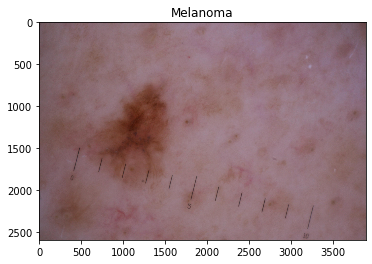

In [ ]:
plt.imshow(mxnet.image.imdecode(open(melanomaImg, 'rb').read()).asnumpy())
plt.title("Melanoma")
display(plt.show())

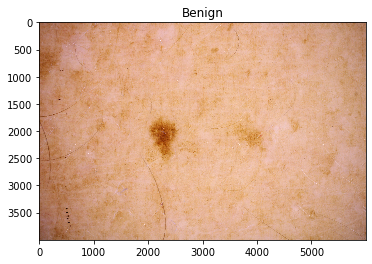

In [ ]:
plt.imshow(mxnet.image.imdecode(open(benignImg, 'rb').read()).asnumpy())
plt.title("Benign")
display(plt.show())

In [ ]:
mxnet.image.imdecode(open(melanomaImg, 'rb').read()).asnumpy()

Out[24]: array([[[106, 77, 81],
 [106, 77, 81],
 [106, 77, 81],
 ...,
 [ 93, 67, 68],
 [ 93, 67, 68],
 [ 92, 66, 67]],

 [[106, 77, 81],
 [106, 77, 81],
 [107, 78, 82],
 ...,
 [ 93, 67, 68],
 [ 93, 67, 68],
 [ 92, 66, 67]],

 [[106, 77, 81],
 [107, 78, 82],
 [107, 78, 82],
 ...,
 [ 93, 67, 68],
 [ 93, 67, 68],
 [ 92, 66, 67]],

 ...,

 [[102, 81, 78],
 [103, 82, 79],
 [103, 82, 79],
 ...,
 [118, 93, 97],
 [117, 92, 96],
 [117, 92, 96]],

 [[104, 80, 78],
 [105, 81, 79],
 [105, 81, 79],
 ...,
 [118, 93, 96],
 [118, 93, 96],
 [118, 93, 96]],

 [[104, 80, 78],
 [105, 81, 79],
 [105, 81, 79],
 ...,
 [119, 94, 97],
 [119, 94, 97],
 [119, 94, 97]]], dtype=uint8)

##8.Train the Model using a Convolution Neural Network

Here we will use transfer learning to train an image classifier. 
It uses feature vectors computed by Inception V3 trained on ImageNet

<img src="https://cdn-images-1.medium.com/max/1800/0*mH17FEz4LHpaJrPb.png" alt="drawing" width="800"/>

In [ ]:
%sh
wget https://raw.githubusercontent.com/tensorflow/tensorflow/c565660e008cf666c582668cb0d0937ca86e71fb/tensorflow/examples/image_retraining/retrain.py

--2021-11-16 01:53:36-- https://raw.githubusercontent.com/tensorflow/tensorflow/c565660e008cf666c582668cb0d0937ca86e71fb/tensorflow/examples/image_retraining/retrain.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43142 (42K) [text/plain]
Saving to: ‘retrain.py’

 0K .......... .......... .......... .......... .. 100% 68.7M=0.001s

2021-11-16 01:53:36 (68.7 MB/s) - ‘retrain.py’ saved [43142/43142]

In [ ]:
%sh ls -al /tmp

total 100
drwxrwxrwt 1 root root 4096 Nov 16 01:53 .
drwxr-xr-x 1 root root 4096 Nov 16 01:47 ..
drwxrwxrwt 2 root root 4096 Nov 16 01:47 .ICE-unix
drwxrwxrwt 2 root root 4096 Nov 16 01:47 .Test-unix
drwxrwxrwt 2 root root 4096 Nov 16 01:47 .X11-unix
drwxrwxrwt 2 root root 4096 Nov 16 01:47 .XIM-unix
drwxrwxrwt 2 root root 4096 Nov 16 01:47 .font-unix
drwxr-xr-x 3 root root 4096 Nov 16 01:48 Rserv
drwx------ 2 root root 4096 Nov 16 01:48 RtmpEKLs3h
-rw-r--r-- 1 root root 22 Nov 16 01:48 chauffeur-daemon-params
-rw-r--r-- 1 root root 4 Nov 16 01:48 chauffeur-daemon.pid
-rw-r--r-- 1 root root 156 Nov 16 01:47 chauffeur-env.sh
-rw-r--r-- 1 root root 466 Nov 16 01:47 custom-spark.conf
-rw-r--r-- 1 root root 19 Nov 16 01:48 driver-daemon-params
-rw-r--r-- 1 root root 4 Nov 16 01:48 driver-daemon.pid
-rw-r--r-- 1 root root 3053 Nov 16 01:48 driver-env.sh
drwxr-xr-x 2 root root 4096 Nov 16 01:48 hsperfdata_root
-rw-r--r-- 1 root root 21 Nov 16 01:48 master-params
drwxrwxrwt 2 root root 4096 Nov 16 01:48 rstudio-rsession
-rw-r--r-- 1 root root 4 Nov 16 01:48 spark-root-org.apache.spark.deploy.master.Master-1.pid
drwx------ 3 root root 4096 Nov 16 01:48 systemd-private-b4f45217d0d744a09dd2731262f27f87-apache2.service-sq5pnv
drwx------ 3 root root 4096 Nov 16 01:47 systemd-private-b4f45217d0d744a09dd2731262f27f87-ntp.service-okoHH9
drwx------ 3 root root 4096 Nov 16 01:47 systemd-private-b4f45217d0d744a09dd2731262f27f87-systemd-resolved.service-e7pBcz
-rw------- 1 root root 0 Nov 16 01:48 tmp.jMp62NhBd5
drwxr-xr-x 3 root root 4096 Nov 16 01:52 training

### 9. Take the model you just downloaded and edit the model and update it so that it works in databricks
Hint: Add in the following import statements "import tensorflow.compat.v1 as tf" "tf.disable_v2_behavior()""

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

WARNING:tensorflow:From /databricks/python/lib/python3.7/site-packages/tensorflow/python/compat/v2_compat.py:111: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term

In [ ]:
%sh /databricks/python/bin/python3 -u /dbfs/FileStore/retrain-1.py --image_dir "/dbfs/tmp/training"  --output_graph "/tmp/melanoma.pb"

2021-11-16 05:48:05.375938: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-16 05:48:05.375974: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
WARNING:tensorflow:From /databricks/python/lib/python3.7/site-packages/tensorflow/python/compat/v2_compat.py:111: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term

In [ ]:
%sh
ls /dbfs/user/

andres.ramos@ccnoai.com
benjamin.harvey@ccnoai.com
bobrie14@jhu.edu
dkuang2@jh.edu
dyao11@jh.edu
fchang16@jhmi.edu
hive
iakujobi@bowiestate.edu
lwei25@jh.edu
nicholas.falcon@maxar.com
rerbe1@jhmi.edu
staphordbengesi@gmail.com
szhan121@jhu.edu
tnewtonwh@gmail.com
xzhan251@jh.edu

In [ ]:
%fs ls 

path,name,size
dbfs:/.kaggle/,.kaggle/,0
dbfs:/100_0_0_20170112213500903.jpg,100_0_0_20170112213500903.jpg,97833
dbfs:/100_0_0_20170112215240346.jpg,100_0_0_20170112215240346.jpg,108750
dbfs:/100_1_0_20170110183726390.jpg,100_1_0_20170110183726390.jpg,60132
dbfs:/100_1_0_20170112213001988.jpg,100_1_0_20170112213001988.jpg,105284
dbfs:/100_1_0_20170112213303693.jpg,100_1_0_20170112213303693.jpg,109423
dbfs:/100_1_0_20170112215032192.jpg,100_1_0_20170112215032192.jpg,40512
dbfs:/100_1_0_20170117195420803.jpg,100_1_0_20170117195420803.jpg,50707
dbfs:/100_1_0_20170119212053665.jpg,100_1_0_20170119212053665.jpg,20022
dbfs:/100_1_2_20170105174847679.jpg,100_1_2_20170105174847679.jpg,19458


In [ ]:
dbutils.fs.cp("file:/dbfs/tmp/melanoma.pb", "dbfs:/melanoma/melanoma.pb", True)

Out[30]: True

In [ ]:
dbutils.fs.cp('file:/dbfs/tmp/retrain_logs', 'dbfs:/melanoma/', True)

Out[31]: True

### 10. Download a different pretrained model and conduct transfer learning and train the model to add additional melanoma and benign features

In [ ]:
### We will use the make_image_classifier which uses by default MobileNetV2.

In [ ]:
%sh whereis wget

wget: /usr/bin/wget /usr/share/info/wget.info.gz

In [ ]:
%sh
/usr/bin/wget  -P /dbfs/FileStore/ranwei/ https://github.com/tensorflow/hub/blob/master/tensorflow_hub/tools/make_image_classifier/make_image_classifier.py 

--2021-11-16 00:45:53-- https://github.com/tensorflow/hub/blob/master/tensorflow_hub/tools/make_image_classifier/make_image_classifier.py
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/dbfs/FileStore/ranwei/make_image_classifier.py’

 0K .......... .......... .......... .......... .......... 4.32M
 50K .......... .......... .......... .......... .......... 6.29M
 100K .......... .......... .......... .......... .......... 6.28M
 150K .......... .......... .......... .......... .......... 5.79M
 200K .......... .......... .......... .......... .......... 6.37M
 250K .......... 6.43M=0.04s

2021-11-16 00:45:54 (5.71 MB/s) - ‘/dbfs/FileStore/ranwei/make_image_classifier.py’ saved [267189]

In [ ]:
%sh
pip install "tensorflow-gpu~=2.0"
pip install "tensorflow-hub[make_image_classifier]~=0.6"

Collecting tensorflow-gpu~=2.0
 Downloading https://files.pythonhosted.org/packages/3a/0b/89319be6c6a043b8b201a42666afe8e3badbdd477eba1829f59a7718bf1f/tensorflow_gpu-2.7.0-cp37-cp37m-manylinux2010_x86_64.whl (489.6MB)
Requirement already satisfied: flatbuffers<3.0,>=1.12 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (2.0)
Requirement already satisfied: six>=1.12.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (1.12.0)
Requirement already satisfied: wheel<1.0,>=0.32.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (0.33.1)
Requirement already satisfied: tensorboard~=2.6 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (2.7.0)
Requirement already satisfied: libclang>=9.0.1 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (12.0.0)
Requirement already satisfied: numpy>=1.14.5 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (1.16.2)
Requirement already satisfied: keras<2.8,>=2.7.0rc0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (2.7.0)
Requirement already satisfied: grpcio<2.0,>=1.24.3 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (1.41.1)
Requirement already satisfied: protobuf>=3.9.2 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (3.19.1)
Requirement already satisfied: keras-preprocessing>=1.1.1 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (1.1.2)
Requirement already satisfied: typing-extensions>=3.6.6 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (4.0.0)
Requirement already satisfied: tensorflow-estimator<2.8,~=2.7.0rc0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (2.7.0)
Requirement already satisfied: tensorflow-io-gcs-filesystem>=0.21.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (0.22.0)
Requirement already satisfied: termcolor>=1.1.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (1.1.0)
Requirement already satisfied: wrapt>=1.11.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (1.13.3)
Requirement already satisfied: gast<0.5.0,>=0.2.1 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (0.4.0)
Requirement already satisfied: h5py>=2.9.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (3.6.0)
Requirement already satisfied: opt-einsum>=2.3.2 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (3.3.0)
Requirement already satisfied: google-pasta>=0.1.1 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (0.2.0)
Requirement already satisfied: absl-py>=0.4.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (1.0.0)
Requirement already satisfied: astunparse>=1.6.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (1.6.3)
Requirement already satisfied: tensorboard-data-server<0.7.0,>=0.6.0 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.6->tensorflow-gpu~=2.0) (0.6.1)
Requirement already satisfied: requests<3,>=2.21.0 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.6->tensorflow-gpu~=2.0) (2.21.0)
Requirement already satisfied: setuptools>=41.0.0 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.6->tensorflow-gpu~=2.0) (59.1.1)
Requirement already satisfied: werkzeug>=0.11.15 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.6->tensorflow-gpu~=2.0) (2.0.2)
Requirement already satisfied: tensorboard-plugin-wit>=1.6.0 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.6->tensorflow-gpu~=2.0) (1.8.0)
Requirement already satisfied: google-auth-oauthlib<0.5,>=0.4.1 in /databricks/python3/lib/python3.7/

In [ ]:
%sh 
cd /dbfs/FileStore/ranwei/
make_image_classifier \
  --image_dir  "/dbfs/tmp/training" \
  --tfhub_module https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 \
  --saved_model_dir /dbfs/FileStore/ranwei/ \
  --labels_output_file class_labels.txt \
  --tflite_output_file new_mobile_model.tflite \
  --summaries_dir my_log_dir

2021-11-16 01:55:50.026639: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-16 01:55:50.026676: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-11-16 01:55:51.910595: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-16 01:55:51.911512: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-16 01:55:51.911621: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-11-16 01:55:51.911694: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-11-16 01:55:51.913891: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2021-11-16 01:55:51.913982: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2021-11-16 01:55:51.914057: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2021-11-16 01:55:51.914074: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
I1116 01:55:51.916602 140102121373888 resolver.py:106] Using /tmp/tfhub_modules to cache modules.
I1116 01:55:51.917234 140102121373888 resolver.py:416] Downloading TF-Hub Module 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'.
I1116 01:55:52.202099 140102121373888 resolver.py:154] Downloaded https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4, Total size: 9.75MB
I1116 01:55:52.202482 140102121373888 resolver.py:431] Downloaded TF-Hub Module 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'.
2021-11-16 01:55:52.361078: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations: AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using module https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with image size (224, 224)
Found 33126 files belonging to 2 classes.
Using 26501 files for training.
Found 33126 files belonging to 2 classes.
Using 6625 files for validation.
Found 2 classes: benign, melanoma
Model: "sequential_1"
_________________________________________________________________
 Layer (type) Output Shape Param # 
=================================================================
 keras_layer (KerasLayer) (None, 1280) 2257984 
 
 dropout (Dropout) (None, 1280) 0 
 
 dense (Dense) (None, 2) 2562 
 
=================================================================
Total params: 2,260,546
Trainable params: 2,562
Non-trainable p

In [ ]:
%sh ls -al /dbfs/FileStore/ranwei

total 10813
drwxrwxrwx 2 root root 4096 Nov 16 02:36 .
drwxrwxrwx 2 root root 4096 Nov 14 18:53 ..
drwxrwxrwx 2 root root 4096 Nov 16 14:11 assets
-rwxrwxrwx 1 root root 16 Nov 16 02:36 class_labels.txt
-rwxrwxrwx 1 root root 267189 Nov 16 00:45 make_image_classifier.py
drwxrwxrwx 2 root root 4096 Nov 16 14:11 my_image_dir
drwxrwxrwx 2 root root 4096 Nov 16 14:11 my_log_dir
-rwxrwxrwx 1 root root 8877488 Nov 16 02:36 new_mobile_model.tflite
-rwxrwxrwx 1 root root 1901966 Nov 16 02:36 saved_model.pb
drwxrwxrwx 2 root root 4096 Nov 16 14:11 variables

##11. Scoring Images using a Convolution Neural Network

In [ ]:
dbutils.fs.mkdirs("file:/tmp/retrain_logs")

Out[15]: True

In [ ]:
dbutils.fs.cp('dbfs:/FileStore/ranwei/my_log_dir/train', 'file:/tmp/retrain_logs', True)

Out[16]: True

In [ ]:
dbutils.fs.cp('dbfs:/FileStore/ranwei/saved_model.pb', 'file:/tmp/melanoma.pb', True)

Out[17]: True

In [ ]:
from tensorflow.core.protobuf import saved_model_pb2
from tensorflow.python.util import compat
from tensorflow.python.platform import gfile

In [ ]:
with tf.Session() as sess:
    model_filename ='/tmp/melanoma.pb'
    with gfile.FastGFile(model_filename, 'rb') as f:
        data = compat.as_bytes(f.read())
        sm = saved_model_pb2.SavedModel()
        sm.ParseFromString(data)
        g_in = tf.import_graph_def(sm.meta_graphs[0].graph_def)
        
        print(sm.meta_graphs[0].graph_def)

WARNING:tensorflow:From <command-2843674451806231>:3: FastGFile.__init__ (from tensorflow.python.platform.gfile) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.gfile.GFile.
node {
 name: "MobilenetV2/expanded_conv_15/depthwise/depthwise_weights"
 op: "VarHandleOp"
 attr {
 key: "_output_shapes"
 value {
 list {
 shape {
 }
 }
 }
 }
 attr {
 key: "allowed_devices"
 value {
 list {
 }
 }
 }
 attr {
 key: "container"
 value {
 s: ""
 }
 }
 attr {
 key: "dtype"
 value {
 type: DT_FLOAT
 }
 }
 attr {
 key: "shape"
 value {
 shape {
 dim {
 size: 3
 }
 dim {
 size: 3
 }
 dim {
 size: 960
 }
 dim {
 size: 1
 }
 }
 }
 }
 attr {
 key: "shared_name"
 value {
 s: "MobilenetV2/expanded_conv_15/depthwise/depthwise_weights"
 }
 }
}
node {
 name: "MobilenetV2/expanded_conv_15/depthwise/depthwise_weights/Read/ReadVariableOp"
 op: "ReadVariableOp"
 input: "MobilenetV2/expanded_conv_15/depthwise/depthwise_weights"
 attr {
 key: "_output_shapes"
 value {
 list {
 shape {
 dim {
 size: 3
 }
 dim {
 size: 3
 }
 dim {
 size: 960
 }
 dim {
 size: 1
 }
 }
 }
 }
 }
 attr {
 key: "dtype"
 value {
 type: DT_FLOAT
 }
 }
}
node {
 name: "MobilenetV2/expanded_conv_4/depthwise/depthwise_weights"
 op: "VarHandleOp"
 attr {
 key: "_output_shapes"
 value {
 list {
 shape {
 }
 }
 }
 }
 attr {
 key: "allowed_devices"
 value {
 list {
 }
 }
 }
 attr {
 key: "container"
 value {
 s: ""
 }
 }
 attr {
 key: "dtype"
 value {
 type: DT_FLOAT
 }
 }
 attr {
 key: "shape"
 value {
 shape {
 dim {
 size: 3
 }
 dim {
 size: 3
 }
 dim {
 size: 192
 }
 dim {
 size: 1
 }
 }
 }
 }
 attr {
 key: "shared_name"
 value {
 s: "MobilenetV2/expanded_conv_4/depthwise/depthwise_weights"
 }
 }
}
node {
 name: "MobilenetV2/expanded_conv_4/depthwise/depthwise_weights/Read/ReadVariableOp"
 op: "ReadVariableOp"
 input: "MobilenetV2/expanded_conv_4/depthwise/depthwise_weights"
 attr {
 key: "_output_shapes"
 value {
 list {
 shape {
 dim {
 size: 3
 }
 dim {
 size: 3
 }
 dim {
 size: 192
 }
 dim {
 size: 1
 }
 }
 }
 }
 }
 attr {
 key: "dtype"
 value {
 type: DT_FLOAT
 }
 }
}
node {
 name: "MobilenetV2/Conv/weights"
 op: "VarHandleOp"
 attr {
 key: "_output_shapes"
 value {
 list {
 shape {
 }
 }
 }
 }
 attr {
 key: "allowed_devices"
 value {
 list {
 }
 }
 }
 attr {
 key: "container"
 value {
 s: ""
 }
 }
 attr {
 key: "dtype"
 value {
 type: DT_FLOAT
 }
 }
 attr {
 key: "shape"
 value {
 shape {
 dim {
 size: 3
 }
 dim {
 size: 3
 }
 dim {
 size: 3
 }
 dim {
 size: 32
 }
 }
 }
 }
 attr {
 key: "shared_name"
 value {
 s: "MobilenetV2/Conv/weights"
 }
 }
}
node {
 name: "MobilenetV2/Conv/weights/Read/ReadVariableOp"
 op: "ReadVariableOp"
 input: "MobilenetV2/Conv/weights"
 attr {
 key: "_output_shapes"
 value {
 list {
 shape {
 dim {
 size: 3
 }
 dim {
 size: 3
 }
 dim {
 size: 3
 }
 dim {
 size: 32
 }
 }
 }
 }
 }
 attr {
 key: "dtype"
 value {
 type: DT_FLOAT
 }
 }
}
node {
 name: "MobilenetV2/expanded_conv_12/project/BatchNorm/gamma"
 op: "VarHandleOp"
 attr {
 key: "_output_shapes"
 value {
 list {
 shape {
 }
 }
 }
 }
 attr {
 key: "allowed_devices"
 value {
 list {
 }
 }
 }
 attr {
 key: "container"
 value {
 s: ""
 }
 }
 attr {
 key: "dtype"
 value {
 type: DT_FLOAT
 }
 }
 attr {
 key: "shape"
 value {
 shape {
 dim {
 size: 96
 }
 }
 }
 }
 attr {
 key: "shared_name"
 value {
 s: "MobilenetV2/expanded_conv_12/project/BatchNorm/gamma"
 }
 }
}
node {
 name: "MobilenetV2/expanded_conv_12/project/BatchNorm/gamma/Read/ReadVariableOp"
 op: "ReadVariableOp"
 input: "MobilenetV2/expanded_conv_12/project/BatchNorm/gamma"
 attr {
 key: "_output_shapes"
 value {
 list {
 shape {
 dim {
 size: 96
 }
 }
 }
 }
 }
 attr {
 key: "dtype"
 value {
 type: DT_FLOAT
 }
 }
}
node {
 name: "MobilenetV2/expanded_conv_12/expand/weights"
 op: "VarHandleOp"
 attr {
 key: "_output_shapes"
 value {
 list {
 shape {
 }
 }
 }
 }
 attr {
 key: "allowed_devices"
 value {
 list {
 }
 }
 }
 attr {
 key: "container"
 value {
 s: ""
 }
 }
 attr {
 key: "dtype"
 value {
 type: DT_

In [ ]:
def displayPrediction(img_path, label):
  image_data = tf.gfile.FastGFile(img_path, 'rb').read()
  with tf.Session() as sess:
    # Feed the image_data as input to the graph and get first prediction
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    
    predictions = sess.run(softmax_tensor, \
             {'DecodeJpeg/contents:0': image_data})
    
    # Sort to show labels of first prediction in order of confidence
    top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]
    plt.imshow(mxnet.image.imdecode(open(img_path, 'rb').read()).asnumpy())
    plt.title(label)
    plt.figtext(0,0,'Model Prediction: Not Cancer: %.5f, Cancer: %.5f' % (predictions[0][1], predictions[0][0]))
    display(plt.show())
    plt.close()

In [ ]:
displayPrediction(melanomaImg, "Melanoma")

--------------------------------------------------------------------------- 
 KeyError Traceback (most recent call last)
 <command-1166845095601040> in <module> 
 ----> 1 displayPrediction ( melanomaImg , "Melanoma" ) 

 <command-1166845095601039> in displayPrediction (img_path, label) 
 3 with tf . Session ( ) as sess : 
 4 # Feed the image_data as input to the graph and get first prediction 
 ----> 5 softmax_tensor = sess . graph . get_tensor_by_name ( 'final_result:0' ) 
 6 
 7 predictions = sess.run(softmax_tensor, \

 /databricks/python/lib/python3.7/site-packages/tensorflow/python/framework/ops.py in get_tensor_by_name (self, name) 
 4069 raise TypeError("Tensor names are strings (or similar), not %s." %
 4070 type(name).__name__)
 -> 4071 return self . as_graph_element ( name , allow_tensor = True , allow_operation = False ) 
 4072 
 4073 def _get_tensor_by_tf_output ( self , tf_output ) : 

 /databricks/python/lib/python3.7/site-packages/tensorflow/python/framework/ops.py in as_graph_element (self, obj, allow_tensor, allow_operation) 
 3893 
 3894 with self . _lock : 
 -> 3895 return self . _as_graph_element_locked ( obj , allow_tensor , allow_operation ) 
 3896 
 3897 def _as_graph_element_locked ( self , obj , allow_tensor , allow_operation ) : 

 /databricks/python/lib/python3.7/site-packages/tensorflow/python/framework/ops.py in _as_graph_element_locked (self, obj, allow_tensor, allow_operation) 
 3935 raise KeyError("The name %s refers to a Tensor which does not "
 3936 "exist. The operation, %s, does not exist in the " 
 -> 3937 "graph." % (repr(name), repr(op_name)))
 3938 try : 
 3939 return op . outputs [ out_n ] 

 KeyError : "The name 'final_result:0' refers to a Tensor which does not exist. The operation, 'final_result', does not exist in the graph."

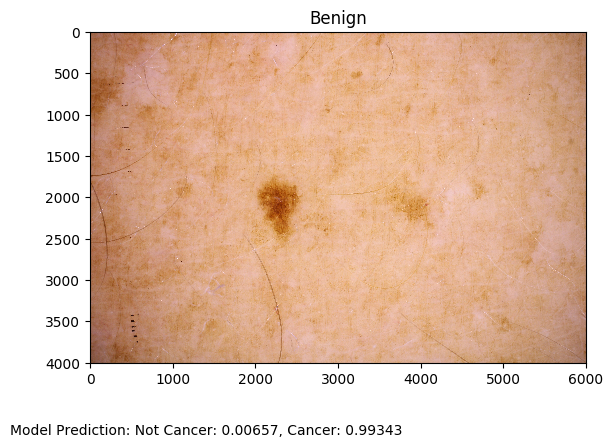

In [ ]:
displayPrediction(benignImg, "Benign")

In [ ]:
dbutils.tensorboard.start("file:/dbfs/FileStore/ranwei/my_log_dir")

TensorBoard log directory set to: file:/dbfs/FileStore/ranwei/my_log_dir. 
 View TensorBoard

In [ ]:
# dbutils.tensorboard.stop()